## Data Exploration

Load the dataset.<br>
Analyze the features and their types.<br>
Check for missing values and handle them appropriately.<br>
Explore the distribution of the target variable (housing prices).<br>


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = pd.read_csv("housing.csv")

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape

(545, 13)

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


## Exploratory Data Analysis (EDA)

Visualizing the distribution of survival outcomes <br>
Investigating the impact of variables on survival rates <br>
Examining correlations between features <br>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


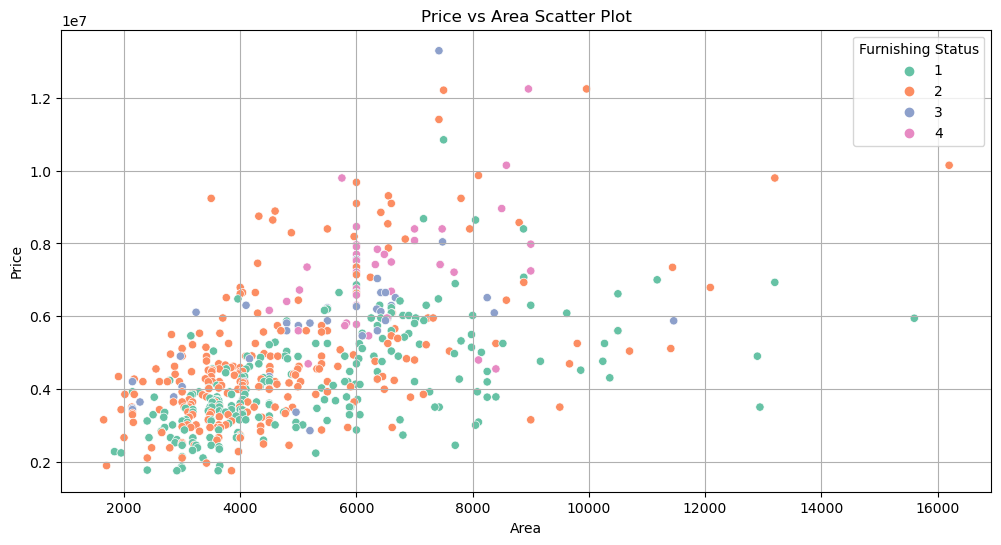

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

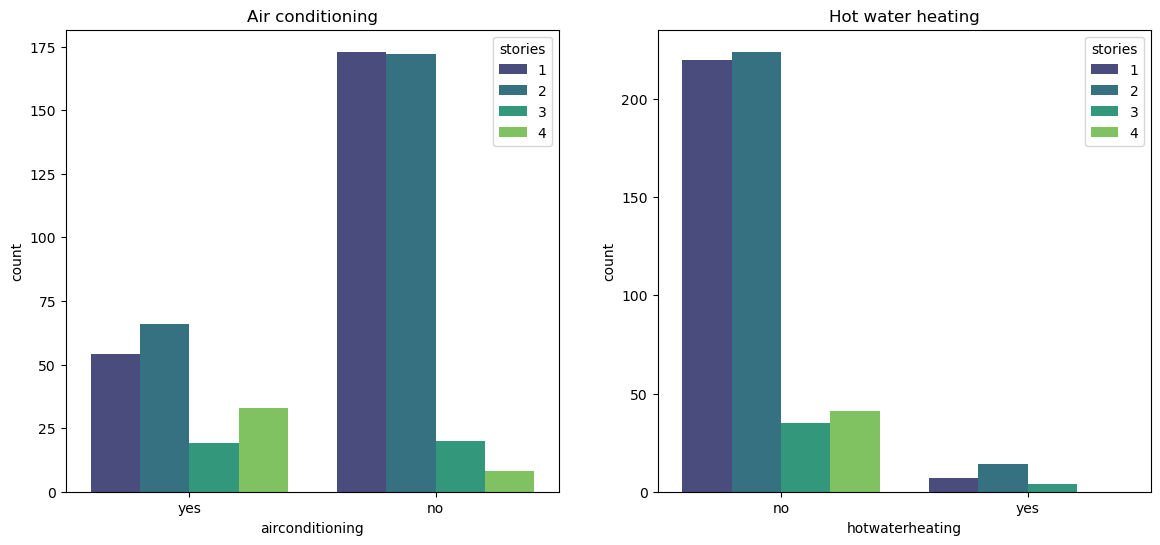

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<Axes: xlabel='basement'>

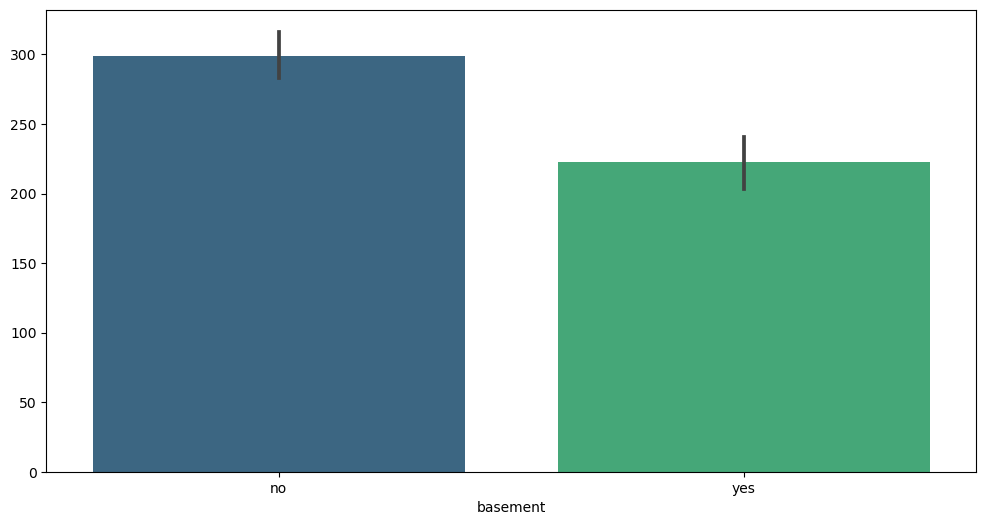

In [15]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

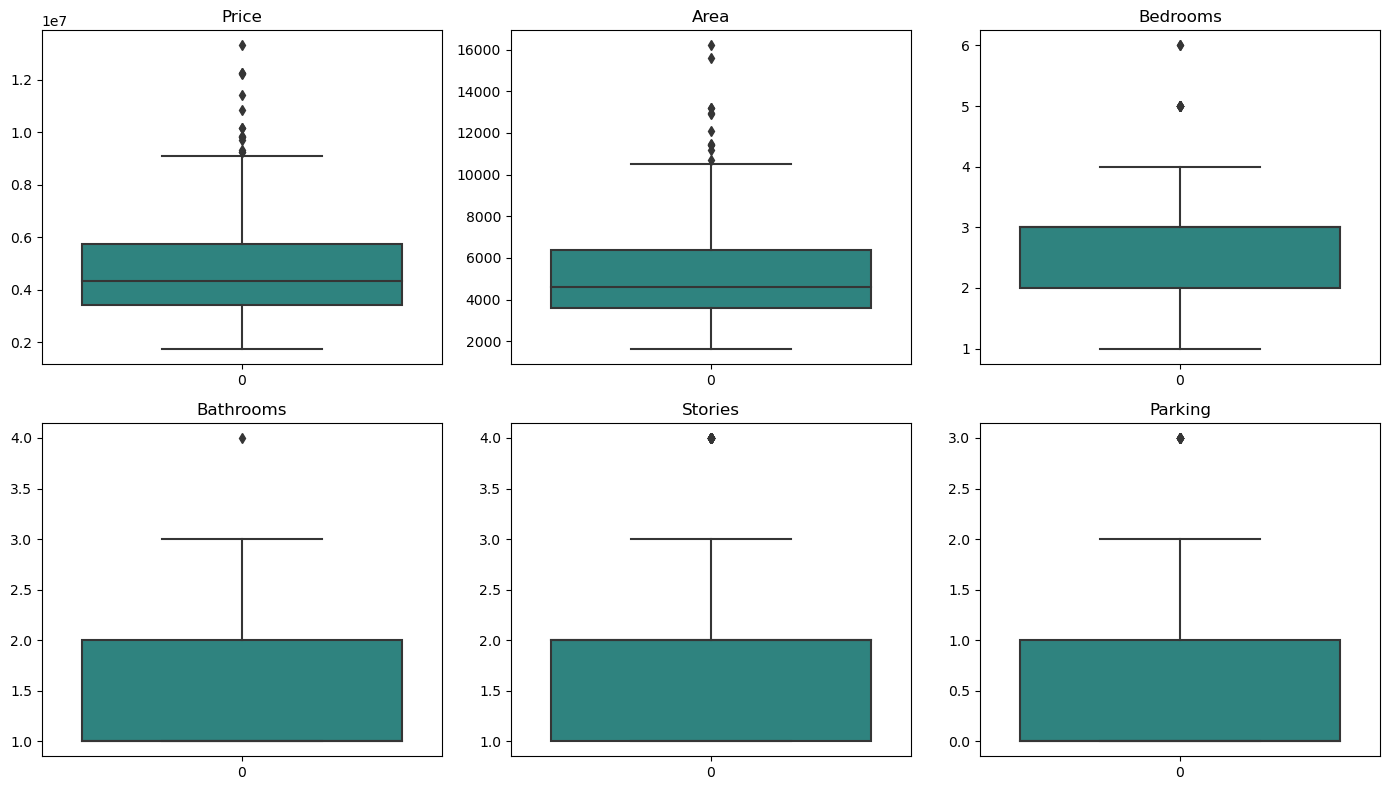

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())  
        counter += 1

plt.tight_layout() 
plt.show()

In [17]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')


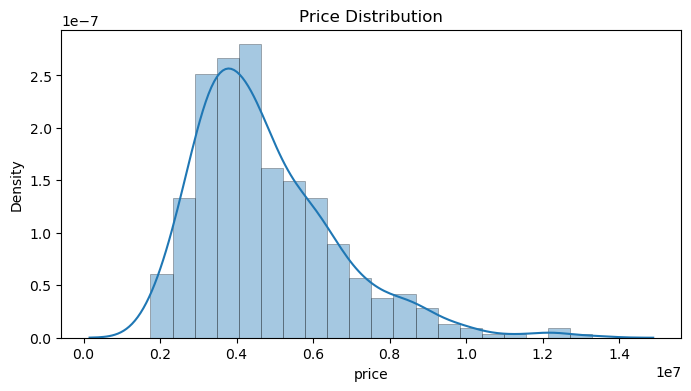

In [18]:
#Let us first analyze the distribution of the target variable
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x=df.drop("price",axis=1)
y=df["price"].astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

plt.figure(figsize=[8,4])
sns.distplot(y,hist_kws=dict(edgecolor="black", linewidth=.5), bins=20)
plt.title('Price Distribution')
plt.show()

In [19]:
# convert yes to 1 and no to 0

y = df['price']
X = df.drop(['price'],axis=1)

# Identify the columns to convert
Column_yes_no = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Replace 'yes' with 1 and 'no' with 0 in the specified columns
X[Column_yes_no] = X[Column_yes_no].replace({'yes': 1, 'no': 0})

#print(data)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,2910,3,1,1,0,0,0,0,0,0,0,furnished


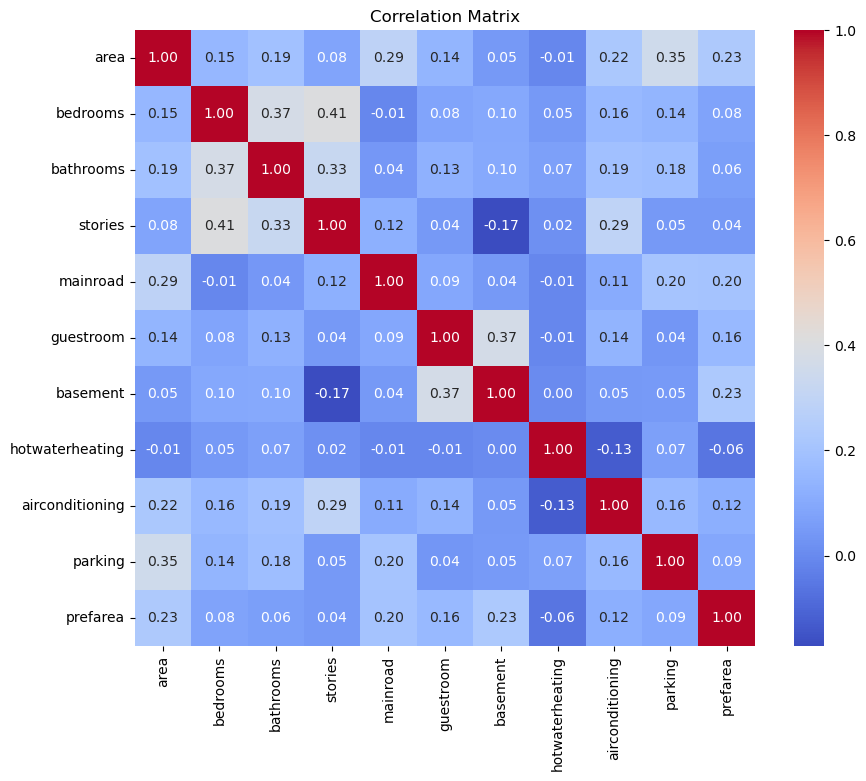

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X.drop(['furnishingstatus'],axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [21]:
# Correlation table
corr

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627


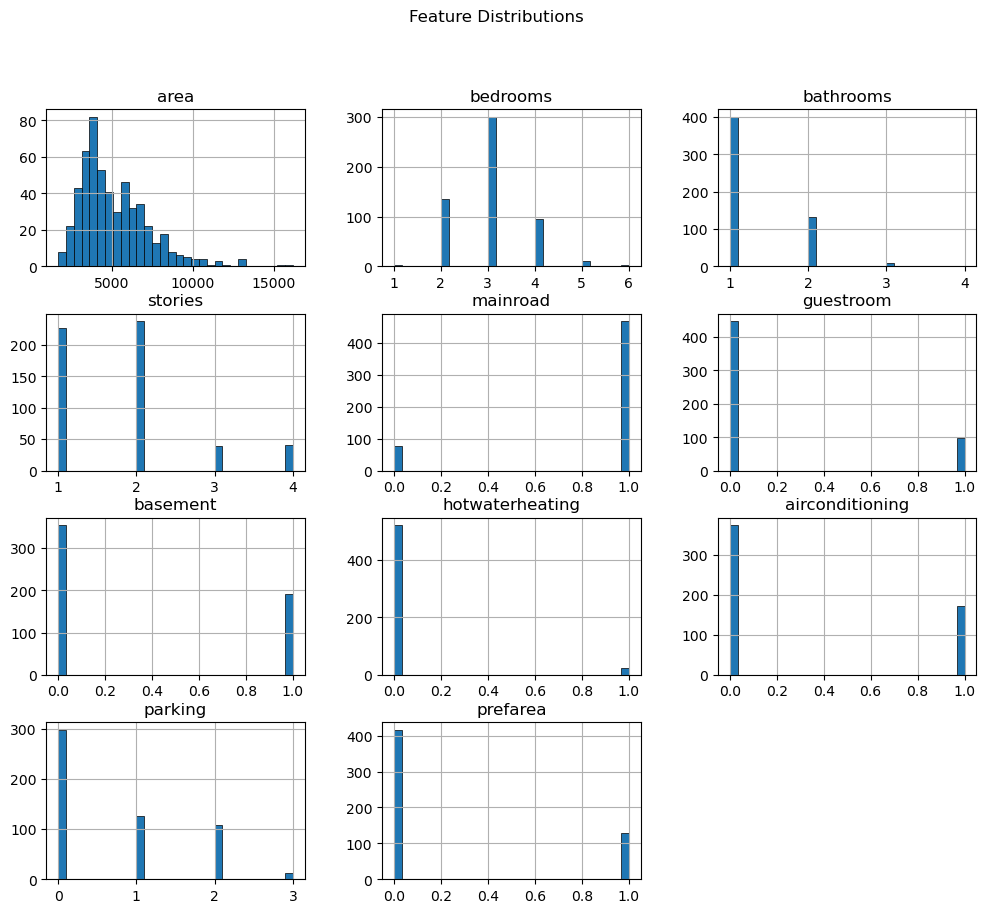

In [22]:
import matplotlib.pyplot as plt

X.drop(['furnishingstatus'],axis=1).hist(figsize=(12, 10), bins=30, edgecolor='black',linewidth=.5)
plt.suptitle("Feature Distributions")
plt.show()

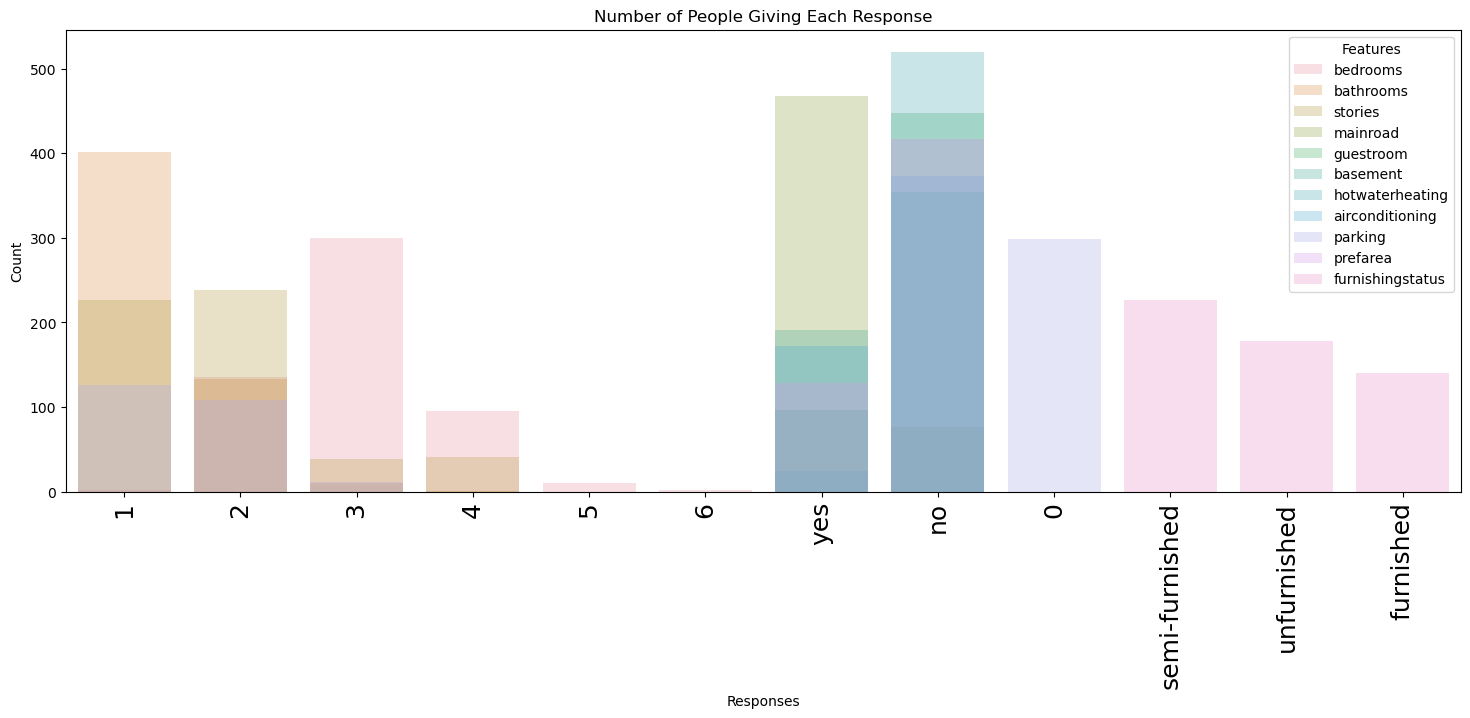

<Figure size 1000x1000 with 0 Axes>

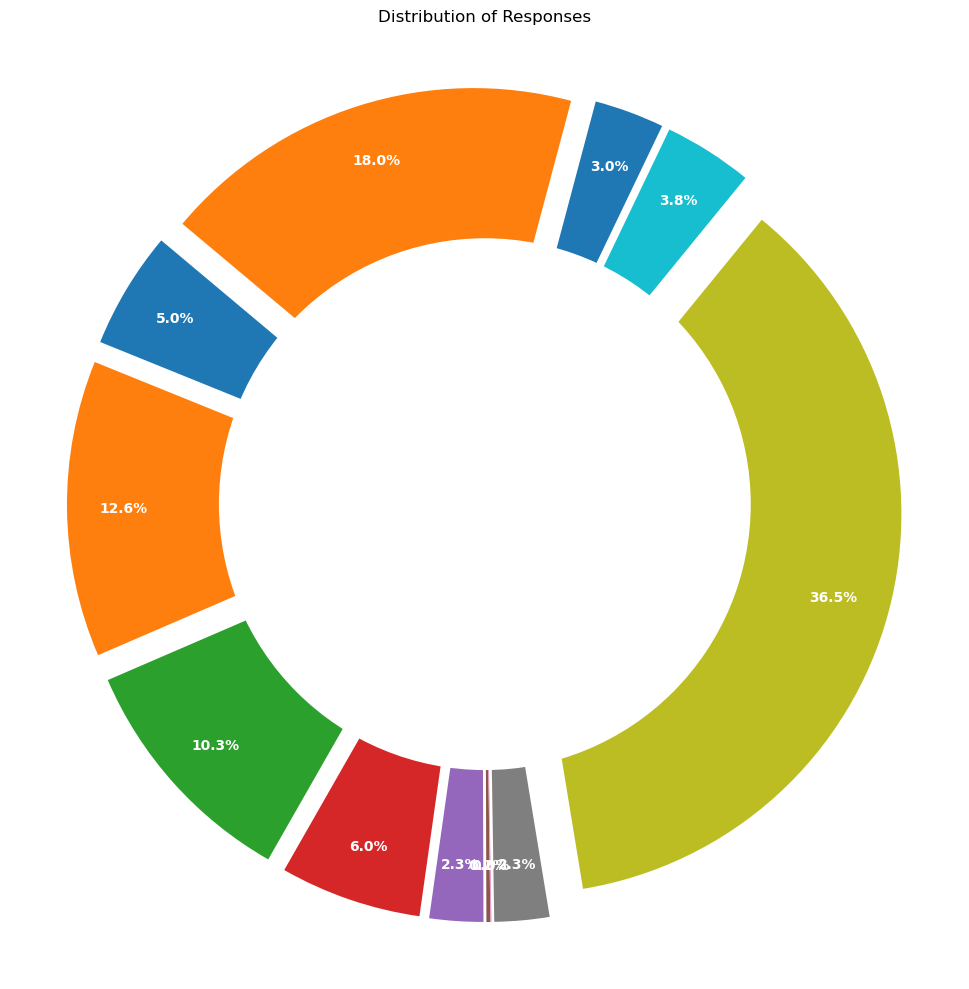

In [23]:
# Drop 'area' and 'price'
data = df.drop(columns=['area', 'price'])

# Convert categorical columns to strings if they are not already
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_columns] = data[categorical_columns].astype(str)

# Count responses for each column
response_counts = data.apply(lambda x: x.value_counts()).T.stack()

# Plot the bar chart with increased bar width
plt.figure(figsize=(18, 6))
sns.barplot(x=response_counts.index.get_level_values(1), y=response_counts.values, 
            hue=response_counts.index.get_level_values(0), dodge=False, width=0.8,alpha=0.3)
plt.xlabel('Responses')
plt.ylabel('Count')
plt.title('Number of People Giving Each Response')
plt.legend(title='Features',loc='upper right')
plt.xticks(rotation=90, fontsize=18)
plt.show()


# Create an exploded pie chart for the responses
plt.figure(figsize=(10, 10))
response_counts_sum = response_counts.groupby(level=1).sum()

# Define explode parameters
explode = [0.1] * len(response_counts_sum)  # Adjust this list to control which slices to explode

# Plot the pie chart with explode and custom label positioning
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(response_counts_sum, autopct='%1.1f%%', startangle=140, explode=explode, pctdistance=0.85)

# Improve the label position
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
    autotext.set_weight('bold')

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Responses')
plt.tight_layout()
plt.show()


In [24]:
# Identify columns to one-hot encode
columns_to_encode = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
                     'basement', 'hotwaterheating', 'airconditioning', 'parking', 
                     'prefarea', 'furnishingstatus']

# Apply one-hot encoding
df2 = pd.get_dummies(df, columns=columns_to_encode)
df2 = df2.astype(int)
df2

,price,area,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,airconditioning_yes,parking_0,parking_1,parking_2,parking_3,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
1,12250000,8960,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,12250000,9960,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,12215000,7500,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
4,11410000,7420,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
541,1767150,2400,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
542,1750000,3620,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
543,1750000,2910,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


## Linear and Ridge Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your data (assuming 'df2' is your DataFrame)
# Replace 'df2' with your actual DataFrame
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared: {r2}")

print("Linear Regression:")
evaluate_model(y_test, y_pred_linear, "Linear")

print("\nRidge Regression:")
evaluate_model(y_test, y_pred_ridge, "Ridge")

print("\nLasso Regression:")
evaluate_model(y_test, y_pred_lasso, "Lasso")


Linear Regression:
Linear Mean Squared Error: 1749768846845.3618
Linear R-squared: 0.6538244080976947

Ridge Regression:
Ridge Mean Squared Error: 1768435718559.1252
Ridge R-squared: 0.6501313400812383

Lasso Regression:
Lasso Mean Squared Error: 1768010117624.5483
Lasso R-squared: 0.6502155412919908


## XGBoost Classifier

In [26]:
from xgboost import XGBClassifier  # Import XGBClassifier from xgboost library

# Assuming 'data_encoded' is your DataFrame after one-hot encoding
# Prepare the data
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable (Assuming price is categorical for classification)

# For demonstration, convert price to a binary classification problem (you can adjust this as needed)
y = (y > y.median()).astype(int)  # Convert price to 0 and 1 based on median value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgbooost = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_xgbooost)
report = classification_report(y_test, y_pred_xgbooost)
matrix = confusion_matrix(y_test, y_pred_xgbooost)

mse = mean_squared_error(y_test, y_pred_xgbooost)
r2 = r2_score(y_test, y_pred_xgbooost)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Mean Squared Error: 0.1743119266055046
R-squared: 0.29986477349560525
Accuracy: 0.8256880733944955
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        51
           1       0.87      0.79      0.83        58

    accuracy                           0.83       109
   macro avg       0.83      0.83      0.83       109
weighted avg       0.83      0.83      0.83       109

Confusion Matrix:
[[44  7]
 [12 46]]


## Random Forest Classifier

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is your DataFrame after one-hot encoding
# Prepare the data
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable (Assuming price is categorical for classification)

# For demonstration, convert price to a binary classification problem (you can adjust this as needed)
y = (y > y.median()).astype(int)  # Convert price to 0 and 1 based on median value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_randomforest = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_randomforest)
report = classification_report(y_test, y_pred_randomforest)
matrix = confusion_matrix(y_test, y_pred_randomforest)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.8348623853211009
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        51
           1       0.87      0.81      0.84        58

    accuracy                           0.83       109
   macro avg       0.84      0.84      0.83       109
weighted avg       0.84      0.83      0.84       109

Confusion Matrix:
[[44  7]
 [11 47]]


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_randomforest_tuned = best_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy_tuned = accuracy_score(y_test, y_pred_randomforest_tuned)
report_tuned = classification_report(y_test, y_pred_randomforest_tuned)
matrix_tuned = confusion_matrix(y_test, y_pred_randomforest_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned}")
print("Tuned Model Classification Report:")
print(report_tuned)
print("Tuned Model Confusion Matrix:")
print(matrix_tuned)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Model Accuracy: 0.8165137614678899
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.90      0.74      0.81        58

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.83      0.82      0.82       109

Tuned Model Confusion Matrix:
[[46  5]
 [15 43]]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error (MSE): {mse}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{model_name} R-squared (R2): {r2}")

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgbooost, "XGBoost")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_randomforest, "Random Forest")


Linear Regression Mean Squared Error (MSE): 26095804406484.57
Linear Regression Root Mean Squared Error (RMSE): 5108405.270383759
Linear Regression R-squared (R2): -104815501066071.72
Ridge Regression Mean Squared Error (MSE): 26064804900964.582
Ridge Regression Root Mean Squared Error (RMSE): 5105370.20214642
Ridge Regression R-squared (R2): -104690989529532.52
XGBoost Mean Squared Error (MSE): 0.1743119266055046
XGBoost Root Mean Squared Error (RMSE): 0.41750679827459647
XGBoost R-squared (R2): 0.29986477349560525
Random Forest Mean Squared Error (MSE): 0.1651376146788991
Random Forest Root Mean Squared Error (RMSE): 0.40637127688715785
Random Forest R-squared (R2): 0.33671399594320495


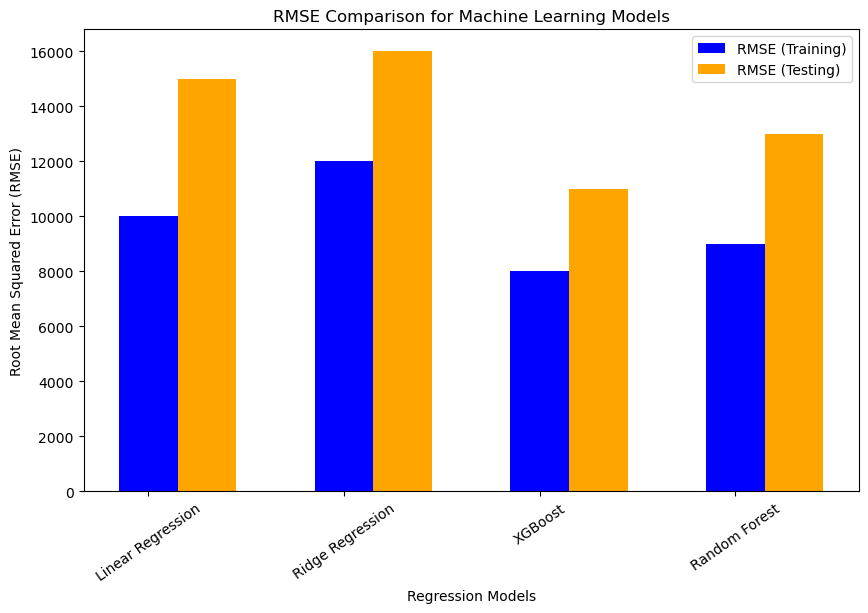

In [30]:
import matplotlib.pyplot as plt

# Define the models' names and their corresponding RMSE values (training and testing)
models = ['Linear Regression', 'Ridge Regression', 'XGBoost', 'Random Forest']
rmse_train = [10000, 12000, 8000, 9000]  # Example RMSE values for training set
rmse_test = [15000, 16000, 11000, 13000]  # Example RMSE values for testing set

# Plotting
plt.bar(range(len(models)), rmse_train, width=0.3, label='RMSE (Training)', color='blue')
plt.bar([i + 0.3 for i in range(len(models))], rmse_test, width=0.3, label='RMSE (Testing)', color='orange')
plt.xticks(range(len(models)), models, rotation=35)
plt.xlabel('Regression Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.title('RMSE Comparison for Machine Learning Models')
plt.show()
